## Cleaning & EDA Notebook

The purpose of this notebook is to perform some preliminary EDA and clean the raw dataset. 

In [92]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import pickle

## 1. Data Cleaning

In [93]:
df = pd.read_csv('training_data.csv', index_col=0)
# index_col=0 prevents generating that 'Unnamed:0' column

In [94]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [95]:
# making dataframe mor readable by creating new column names
rename_list = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 
'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
'payment_sep', 'payment_aug', 'payments_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)

In [96]:
# checking that it worked
df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april,default
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [97]:
df.iloc[18381]

max_credit_given                     LIMIT_BAL
gender                                     SEX
education                            EDUCATION
marital_status                        MARRIAGE
age                                        AGE
pay_status_sept                          PAY_0
pay_status_aug                           PAY_2
pay_status_july                          PAY_3
pay_status_june                          PAY_4
pay_status_may                           PAY_5
pay_status_april                         PAY_6
bill_sept                            BILL_AMT1
bill_aug                             BILL_AMT2
bill_july                            BILL_AMT3
bill_june                            BILL_AMT4
bill_may                             BILL_AMT5
bill_april                           BILL_AMT6
payment_sep                           PAY_AMT1
payment_aug                           PAY_AMT2
payments_jul                          PAY_AMT3
payment_jun                           PAY_AMT4
payment_may  

In [98]:
df.shape

(22500, 24)

In [1]:
# create a function that can remove this row if it has these values in the row
df.drop(df[df.gender == 'SEX'].index, inplace=True)

NameError: name 'df' is not defined

In [100]:
# checking that worked
df.shape

(22499, 24)

now that the row with column names is gone, we can convert the entire dataframe from objects to float/int

In [101]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
max_credit_given    22499 non-null object
gender              22499 non-null object
education           22499 non-null object
marital_status      22499 non-null object
age                 22499 non-null object
pay_status_sept     22499 non-null object
pay_status_aug      22499 non-null object
pay_status_july     22499 non-null object
pay_status_june     22499 non-null object
pay_status_may      22499 non-null object
pay_status_april    22499 non-null object
bill_sept           22499 non-null object
bill_aug            22499 non-null object
bill_july           22499 non-null object
bill_june           22499 non-null object
bill_may            22499 non-null object
bill_april          22499 non-null object
payment_sep         22499 non-null object
payment_aug         22499 non-null object
payments_jul        22499 non-null object
payment_jun         22499 non-null object
payment_may

In [102]:
# changing all values from objects to
df = df.apply(pd.to_numeric, errors='coerce')

In [103]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
max_credit_given    22499 non-null int64
gender              22499 non-null int64
education           22499 non-null int64
marital_status      22499 non-null int64
age                 22499 non-null int64
pay_status_sept     22499 non-null int64
pay_status_aug      22499 non-null int64
pay_status_july     22499 non-null int64
pay_status_june     22499 non-null int64
pay_status_may      22499 non-null int64
pay_status_april    22499 non-null int64
bill_sept           22499 non-null int64
bill_aug            22499 non-null int64
bill_july           22499 non-null int64
bill_june           22499 non-null int64
bill_may            22499 non-null int64
bill_april          22499 non-null int64
payment_sep         22499 non-null int64
payment_aug         22499 non-null int64
payments_jul        22499 non-null int64
payment_jun         22499 non-null int64
payment_may         22499 non-nu

## More Data Cleaning

### Fixing general categorical variables

In [104]:
# Categorical variables description
df[['gender', 'education', 'marital_status']].describe()

,gender,education,marital_status
count,22499.000000,22499.000000,22499.000000
mean,1.603227,1.855282,1.553358
std,0.489239,0.791905,0.521418
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [105]:
# Next deal with- why are there other educations besides 1-4 ??
df['education'].value_counts()

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: education, dtype: int64

- 'education' has category 5 and 6 that are unlabeled, and the category 0 is undocumented.
- 'marital_status' has a label 0 that is undocumented

They just put the weird values in the 'other' categories. is this safe to do?
let's check to see what other people did first
- 'other' in education can be an education lower than the high school level.
- 'other' in marital_status could be, for example, "divorced".

In [106]:
# fixing 'education' column by putting unknown variables in 'other' category (4)
fix_edu = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[fix_edu, 'education'] = 4

# fixing 'marital_status' column
df.loc[df.marital_status == 0, 'marital_status'] = 3

In [107]:
df.education.value_counts()

2    10516
1     7919
3     3713
4      351
Name: education, dtype: int64

In [108]:
df.marital_status.value_counts()

2    12026
1    10195
3      278
Name: marital_status, dtype: int64

## 2. EDA

## Checking for irregularities, by column groups



In [109]:
# code for generating histograms

def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

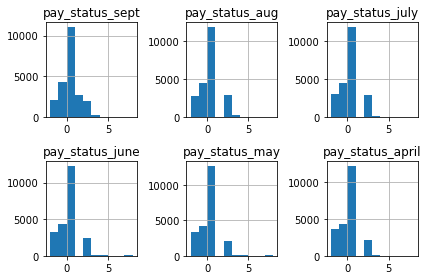

In [110]:
# checking distribution of History of Past Payment (payment)
late = df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']]
draw_histograms(late, late.columns, 2, 3, 10)

#this is probably more of a category

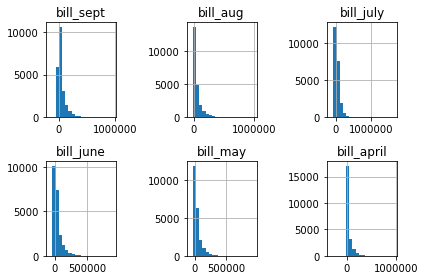

In [111]:
# checking Amount of Bill Statement
bills = df[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']]
draw_histograms(bills, bills.columns, 2, 3, 20)

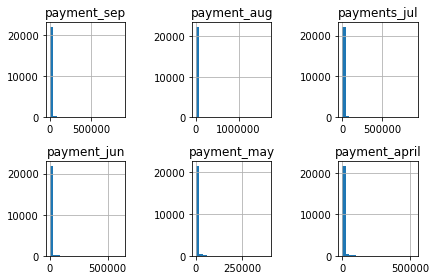

In [112]:
# checking Amount of Previous Payment
pay = df[['payment_sep', 'payment_aug', 'payments_jul', 'payment_jun', 'payment_may', 'payment_april']]
draw_histograms(pay, pay.columns, 2, 3, 20)

### Checking History of Past Payment (Payment Delay)

In [113]:
# this should be on a scale from -1, 1-9
# -1 being 'pay duly' and 1-9 being how many months of payment delay

df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()

,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613
std,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


- There shouldn't be any -2 here, so let's just set it to 'pay duly' as if there wasn't any delay
- and 'pay duly' should probably just be 0 instead of -1 because that means the payment wasn't delayed

In [128]:
fix_status = (df.pay_status_sept == -2) | (df.pay_status_sept == -1) | (df.pay_status_sept == 0)
df.loc[fix_status, 'pay_status_sept'] = 0

fix_status = (df.pay_status_aug == -2) | (df.pay_status_aug == -1) | (df.pay_status_aug == 0)
df.loc[fix_status, 'pay_status_aug'] = 0

fix_status = (df.pay_status_july == -2) | (df.pay_status_july == -1) | (df.pay_status_july == 0)
df.loc[fix_status, 'pay_status_july'] = 0

fix_status = (df.pay_status_june == -2) | (df.pay_status_june == -1) | (df.pay_status_june == 0)
df.loc[fix_status, 'pay_status_june'] = 0

fix_status = (df.pay_status_may == -2) | (df.pay_status_may == -1) | (df.pay_status_may == 0)
df.loc[fix_status, 'pay_status_may'] = 0

fix_status = (df.pay_status_april == -2) | (df.pay_status_april == -1) | (df.pay_status_april == 0)
df.loc[fix_status, 'pay_status_april'] = 0

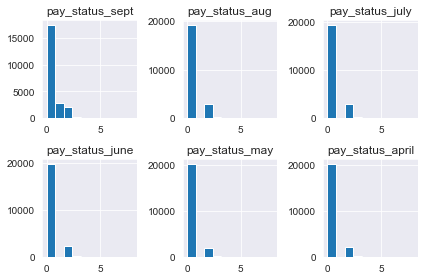

In [129]:
late = df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']]
draw_histograms(late, late.columns, 2, 3, 10)

### checking amount of bill statement

In [115]:
# checking amount of bill statement
df[['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']].describe()

,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april
count,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000
mean,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356
std,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959
min,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000
25%,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000
50%,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000
75%,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


- negative values can be interpreted as credit

### checking amount of previous statement

In [117]:
# checking amount of previous statement
df[['payment_sep', 'payment_aug', 'payments_jul', 'payment_jun', 'payment_may', 'payment_april']].describe()

,payment_sep,payment_aug,payments_jul,payment_jun,payment_may,payment_april
count,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000
mean,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301
std,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000
50%,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000


### Checking the Amount of Credit Given to Each Person

In [119]:
# checking the amount of credit given to each person
df.max_credit_given.describe()

count      22499.000000
mean      167054.521534
std       129864.960118
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: max_credit_given, dtype: float64

In [120]:
# general idea of the default probablity for this dataset?
df.default.sum() / len(df.default)
# this is confirmed by checking the class imbalence, right?

0.22347659895995378

## Data Visualization

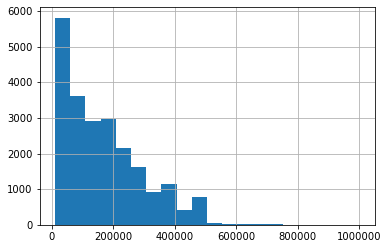

In [122]:
df.max_credit_given.hist(bins = 20)

- we can use a denisty plot to better visualize this

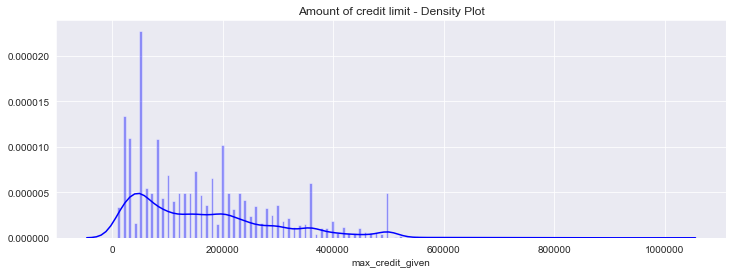

In [144]:
plt.figure(figsize = (12,4))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['max_credit_given'],kde=True,bins=200, color="blue")
plt.show()

- this visualize the amount of credit limit with a denisty plot
- Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.



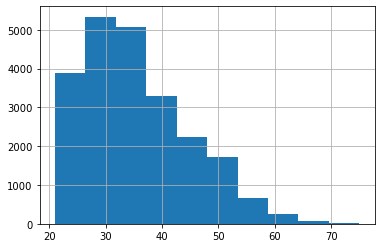

In [121]:
df.age.hist()

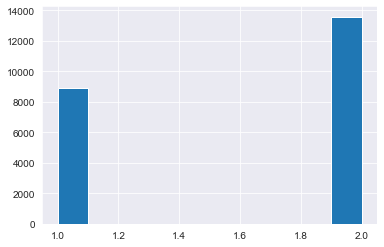

In [131]:
df.gender.hist()

### Checking Correlations with the Target
The goal is to see how relevant each feature is, what is its meaning, if it can be used to create new features.

In [136]:
sex = df.groupby(['gender', 'default']).size().unstack(1)
sex

default,0,1
gender,,
1,6758,2169
2,10713,2859


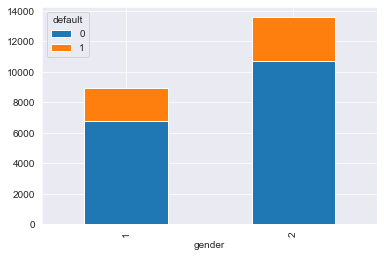

In [138]:
sex.plot(kind='bar', stacked = True)

Considering that about 22% of the customers will default, we see a couple of things:
- there are significantly more women than men
- men are most likely going to default the next month

In [141]:
edu_level = df.groupby(['education', 'default']).size().unstack(1)
edu_level

default,0,1
education,,
1,6388,1531
2,7998,2518
3,2764,949
4,321,30


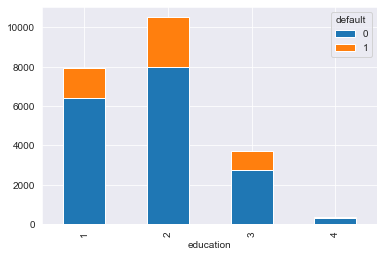

In [142]:
edu_level.plot(kind='bar', stacked = True)

### Checking for Multicolinearity Between Features

#### Let's check the correlation between Repayment status in April - September 2005.

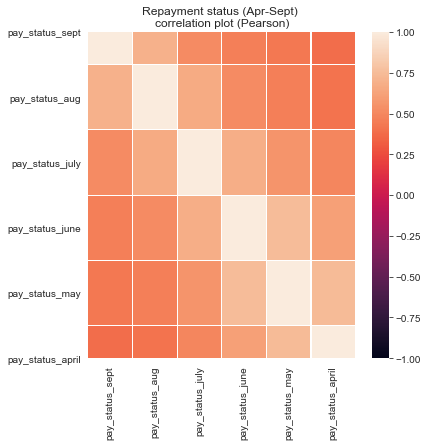

In [146]:
var = ['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']

plt.figure(figsize = (6,6))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

- Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

#### checking the correlation of Amount of bill statement in April - September 2005.

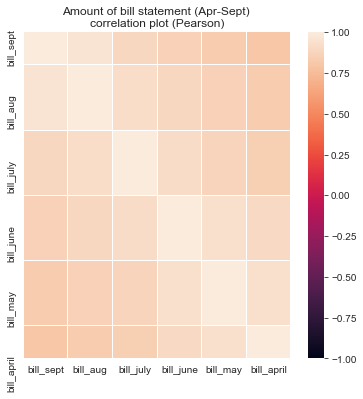

In [148]:
var = ['bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']

plt.figure(figsize = (6,6))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

- Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

#### checking the correlation of Amount of previous payment in April - September 2005.

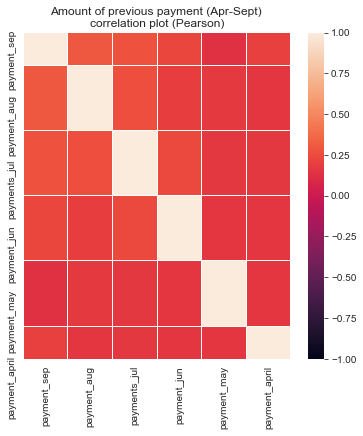

In [150]:
var = ['payment_sep', 'payment_aug', 'payments_jul', 'payment_jun', 'payment_may', 'payment_april']
plt.figure(figsize = (6,6))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

- There are no correlations between amounts of previous payments for April-Sept 2005.